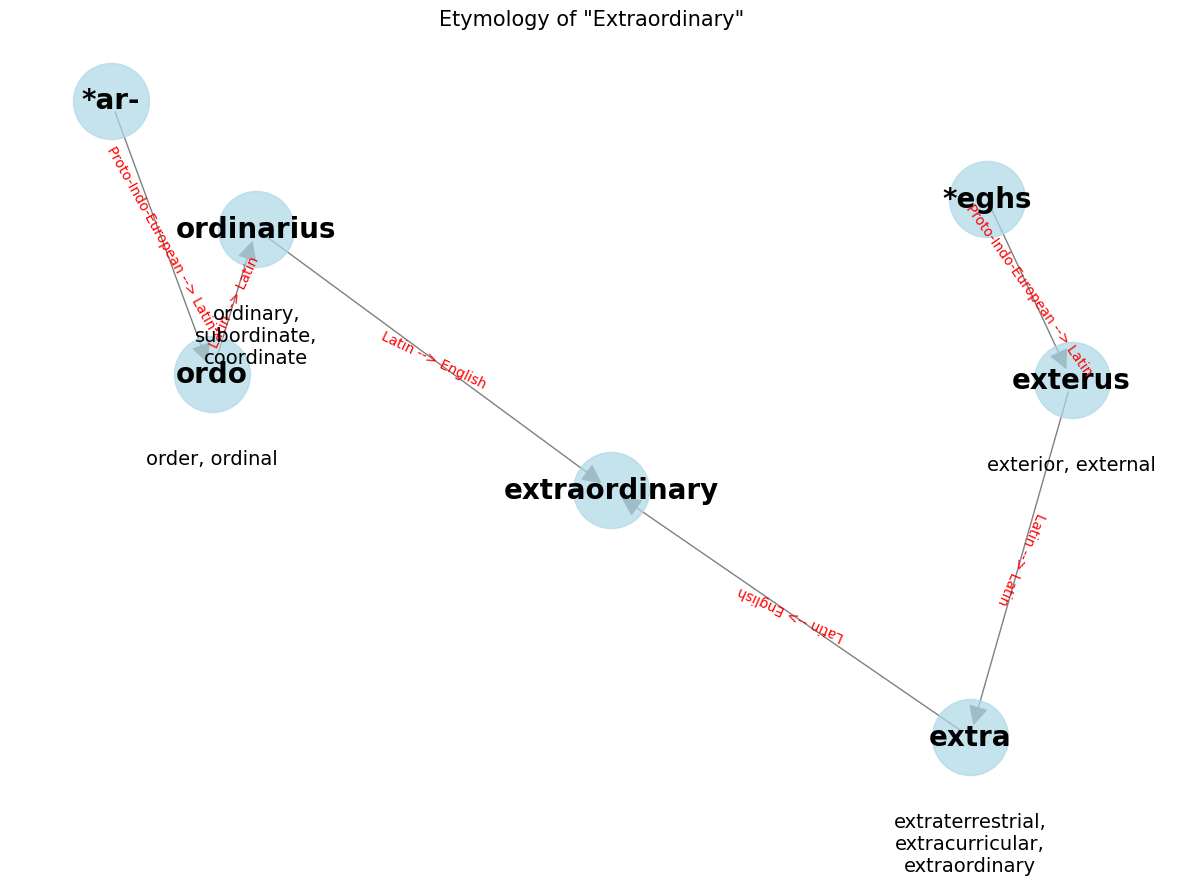

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import textwrap
import numpy as np  # For calculating text rotation


# Define the etymology data for "extraordinary"
extraordinary_data = {
  "word": "extraordinary",
  "meaning": "beyond what is ordinary, usual or expected",
  "language": "English",
  "tracing": ["English extraordinary <-- Middle French extraordinaire <-- Latin extraordinarius"],
  "history": "The term 'extraordinary' originates from the Latin word 'extraordinarius', which is a combination of 'extra-', meaning 'beyond' or 'outside of', and 'ordinarius', meaning 'ordinary' or 'usual'. This term was adopted into Middle French as 'extraordinaire', and then entered English in the late 15th century, retaining the meaning of something that is beyond the ordinary or usual.",
  "parts": [
    {
      "part": "extra",
      "type": "prefix",
      "language": "Latin",
      "meaning": "beyond, outside of"
    },
    {
      "part": "ordinarius",
      "type": "root",
      "language": "Latin",
      "meaning": "ordinary, usual"
    }
  ],
  "etymology": [
    {
      "part": "extra",
      "meaning": "beyond, outside of",
      "example_words": ["extraterrestrial", "extracurricular", "extraordinary"],
      "language": "Latin",
      "history": "Derived from 'exterus', meaning 'outer', 'extra' is used to denote something that lies outside the conventional boundaries.",
      "tracing": ["Latin extra <-- Latin exterus <-- Proto-Indo-European *eghs"],
      "etymology": [
        {
          "part": "exterus",
          "meaning": "outer",
          "language": "Latin",
          "history": "Meaning 'outer' or 'external', 'exterus' was used in various Latin compounds to denote external aspects or locations.",
          "example_words": ["exterior", "external"],
          "tracing": ["Latin exterus <-- Proto-Indo-European *eghs"],
          "etymology": [
            {
              "part": "*eghs",
              "meaning": "out of, from",
              "language": "Proto-Indo-European",
              "history": "A prehistoric root denoting a motion from within to the outside, leading to various derivatives in Indo-European languages indicating directionality or position.",
              "example_words": [],
              "tracing": []
            }
          ]
        }
      ]
    },
    {
      "part": "ordinarius",
      "meaning": "ordinary, usual",
      "example_words": ["ordinary", "subordinate", "coordinate"],
      "language": "Latin",
      "history": "Stems from 'ordo', meaning 'order', signifying something that adheres to the regular, established order.",
      "tracing": ["Latin ordinarius <-- Latin ordo"],
      "etymology": [
        {
          "part": "ordo",
          "meaning": "order",
          "language": "Latin",
          "history": "Refers to a sequence or arrangement, implying a natural or expected order.",
          "example_words": ["order", "ordinal"],
          "tracing": ["Latin ordo <-- Proto-Indo-European *ar-"],
          "etymology": [
            {
              "part": "*ar-",
              "meaning": "to fit together",
              "language": "Proto-Indo-European",
              "history": "A root suggesting the fitting together or arrangement of parts, foundational for words related to organization and systematic arrangement.",
              "example_words": [],
              "tracing": []
            }
          ]
        }
      ]
    }
  ]
}


# Create a directed graph
G = nx.DiGraph()

def add_to_graph(graph, data, parent=None):
    node_data = {key: data.get(key, '') for key in ['part', 'language', 'meaning', 'example_words']}
    node = node_data['part']
    graph.add_node(node, **node_data)
    if parent:
        graph.add_edge(parent, node)
    for child in data.get('etymology', []):
        add_to_graph(graph, child, parent=node)

add_to_graph(G, {"part": extraordinary_data["word"], "language": extraordinary_data["language"], "meaning": extraordinary_data["meaning"], "etymology": extraordinary_data["etymology"]})

pos = nx.spring_layout(G)

plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle="<|-", arrowsize=30, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=20, font_weight="bold")

# Adjusting edge label rotation for readability and correct orientation
for edge in G.edges:
    source, target = edge
    source_pos, target_pos = pos[source], pos[target]
    dx, dy = target_pos[0] - source_pos[0], target_pos[1] - source_pos[1]
    angle = np.degrees(np.arctan2(dy, dx))
    
    # Check and adjust the angle for readability without reversing direction
    # if not (-90 < angle < 90):
    #     angle -= 180  # Adjusting angle to correct direction if it's reversed
    angle = angle + 180

    label = f"{G.nodes[target]['language']} --> {G.nodes[source]['language']}"
    x, y = (source_pos[0] + target_pos[0]) / 2, (source_pos[1] + target_pos[1]) / 2
    plt.text(x, y, label, rotation=angle, rotation_mode='anchor', fontsize=10, color='red', ha='center', va='center')

for node, (x, y) in pos.items():
    examples = ", ".join(G.nodes[node].get('example_words', []))
    wrapped_text = textwrap.fill(examples, width=20)
    plt.text(x, y - 0.1, wrapped_text, fontsize=14, ha='center', va='top', wrap=True)

plt.title('Etymology of "Extraordinary"', fontsize=15)
plt.axis('off')
plt.show()
